In [1]:
# %matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.plot as pl

In [2]:
ksp = np.load('projection_ksp.npy')
coord = np.load('projection_coord.npy')

print('k-space array shape: {}'.format(ksp.shape))
print('coordinate array shape: {}'.format(coord.shape))

k-space array shape: (12, 96, 512)
coordinate array shape: (96, 512, 2)


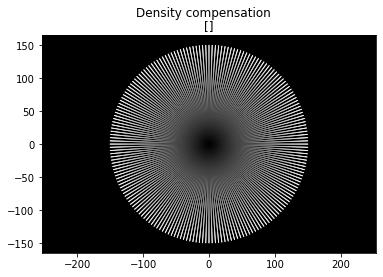

In [3]:
dcf = (coord[..., 0]**2 + coord[..., 1]**2)**0.5
pl.ScatterPlot(coord, dcf, title='Density compensation')

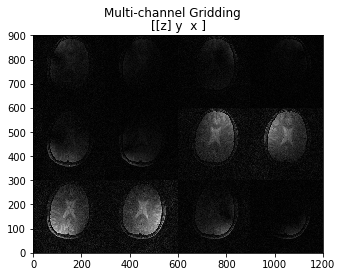

(12, 300, 300)

In [4]:
img_grid = sp.nufft_adjoint(ksp * dcf, coord)
pl.ImagePlot(img_grid, z=0, title='Multi-channel Gridding')
img_grid.shape

In [7]:
## 12 coils, 96 spikes and 512 samples on each spikes
ksp.shape


(12, 96, 512)

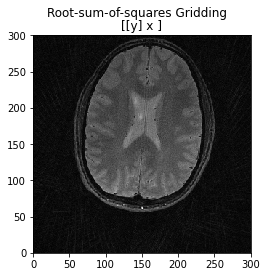

In [5]:
img_rss = np.sum(np.abs(img_grid)**2, axis=0)**0.5
pl.ImagePlot(img_rss, title='Root-sum-of-squares Gridding')

In [24]:
%time img_grid_tune2 = sp.nufft_adjoint(ksp * dcf, coord, oversamp=5, width=3)
#img_grid_tune = sp.nufft_adjoint(ksp * dcf, coord, oversamp=1, width=2)

CPU times: user 1.32 s, sys: 680 ms, total: 2 s
Wall time: 2.02 s


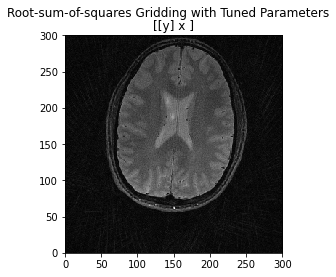

In [25]:
img_rss_tune = np.sum(np.abs(img_grid_tune2)**2, axis=0)**0.5
pl.ImagePlot(img_rss_tune, title='Root-sum-of-squares Gridding with Tuned Parameters')

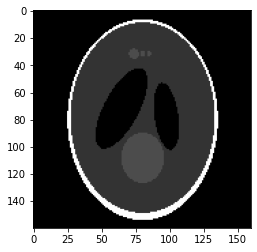

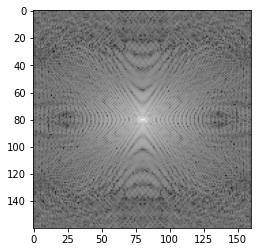

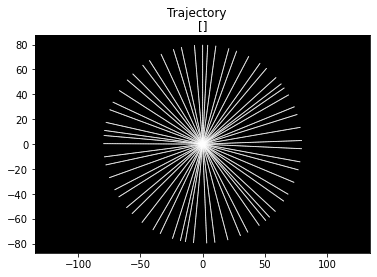

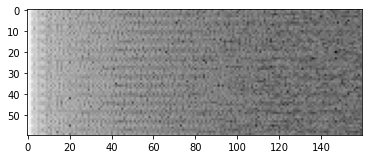

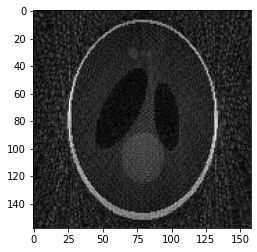

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import sigpy as sp
from sigpy.mri import samp
import sigpy.plot as pl


def fftc_2d(_data):
    data = _data.copy()
    data = np.fft.ifftshift(data)
    data = np.fft.fft2(data, norm="ortho")
    return np.fft.fftshift(data)    

def ifftc_2d(_data):
    data = _data.copy()
    data = np.fft.ifftshift(data)
    data = np.fft.ifft2(data, norm="ortho")
    return np.fft.fftshift(data)    

def show_image(image):
    plt.figure()
    plt.imshow(np.abs(image), cmap='gray')
    plt.show()

def show_kspace(kspace):
    plt.figure()
    plt.imshow(np.log(np.abs(kspace)), cmap='gray')
    plt.show()

# create shepp-logan image and k-space
image_shape = (160, 160)
shepp_image = sp.shepp_logan(image_shape)
show_image(shepp_image)
shepp_kspace = fftc_2d(shepp_image)
show_kspace(shepp_kspace)

# sample as radial style
spoke_num, sample_num = 60, 160
coord_shepp = samp.radial([spoke_num, sample_num, 2], image_shape)
pl.ScatterPlot(coord_shepp, title='Trajectory')

# if no offset to the coord, no image can be reconstructed
# BUT the k-space is very strange (the data in middle column shall have the largest magitude)
coord_offset = 80
kspace_nu = sp.interpolate(shepp_kspace, coord_shepp + coord_offset)
show_kspace(kspace_nu)

dcf_nu = (coord_shepp[..., 0]**2 + coord_shepp[..., 1]**2)**0.5
image_nu = sp.nufft_adjoint(kspace_nu * dcf_nu, coord_shepp)
show_image(image_nu)